# XOR PROBLEM WITH NEURAL NETWORK
*(PARHAM NAYERI)*

*(APADANA)*

*(OSTAD ZARE)*


# IMPORT NUMPAY LIBRARY


In [ ]:
# <<if u dont have numpy run this cell>>
! pip install numpy
#<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>

In [2]:
import numpy as np

# Meqdar Dehi Avaliye XOR

In [3]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])
test = np.array([[1,0],[0,1],[0,0]])
epoch = 10000
rate = 0.1

# XOR MLP (Multi Layer Perceptron)
dar XOR problem ma nemitavanim az single layer perceptron( Manade AND va OR ) estefade konim va bayad az multi layer estefade konim manande akse zir ke daraye 2 Neuron vorodi( Input Neuron ) va 2 Neuron makhfi ( hidden Neuron ) va yek khoroji (Output Neuron ) ast

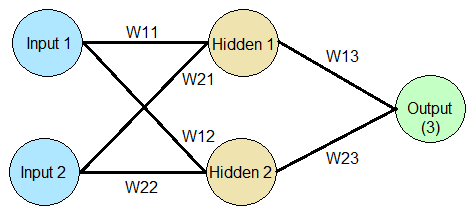


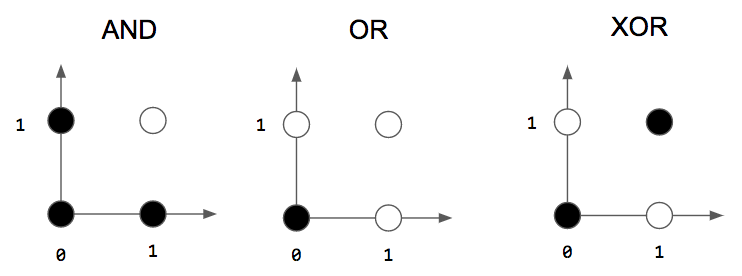

hamantor ke dar tasvir bala mibinid ma nemitavanim ba yek khat XOR ra joda Sazi konim

In [4]:
iNeu = 2 
hNeu = 2
oNeu = 1

har input be har do Hidden Neuron vasl mishavad va ma 4 vorodi be hidden layer darim va 2 vorodi be output neuron va ba method *np.random.uniform()* baraye anha vazn haei besorat random misazim 

In [5]:
wHidden = np.random.uniform(size=(iNeu,hNeu)) # baraye W11,W21,W12,W22 >> [W11 W21] [W12 W22]
wOut = np.random.uniform(size=(hNeu,oNeu)) # Baraye W13,W23 >> [W13] [W21]
bHidden = np.random.uniform(size=(1,hNeu)) # bias vorodi be Hidden Layer [b1 b2]
bOut = np.random.uniform(size=(1,oNeu)) # bias vorodi be Output Layer [b3]

# SIGMOID Functions 

Sigmoid : Yek model bazeye 0 - 1 ast ke be tadrij az 0 be 1 miravad 


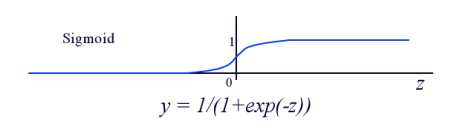


exp(-z) dar formul be in manast ke adade (e)^(adade vorodi)
in function mizan vorodi ra mahdod be bazeye 0 o 1 mikonad

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_Moshtaq(x):
    return sigmoid(x) * (1 - x)
# Ma az Moshtaq Sigmoid baraye hesab kardan Gradient Descent niyaz darim 

# Training Algorithms Function

Ma az ye for loop 3 marhalei estefade mikonim baraye train kardan model

step 1 : Hesabe avaliye
    np.dot() baraye zarb matrixi array ha dar ham estefade shode

    sigmoid() baraye mahdod kardan khoroji ha beyne 0 o 1 estefade mikonim

step 2 :  mohasebeye ERROR

step 3 : Update kardane Weight va Bias 

In [7]:
for _ in range(epoch):
    #Step 1
    hidden = sigmoid(np.dot(x, wHidden) + bHidden) 
    output = sigmoid(np.dot(hidden, wOut) + bOut)
    #step 2
    errorOut = y - output
    d_prediction = errorOut * sigmoid_Moshtaq(output)
    errorHidden = d_prediction.dot(wOut.T)
    d_hidden = errorHidden * sigmoid_Moshtaq(hidden)
    #step 3
    wOut += hidden.T.dot(d_prediction) * rate
    wHidden += x.T.dot(d_hidden) * rate
    bHidden += np.sum(d_hidden, axis=0, keepdims=True) * rate
    bOut += np.sum(d_prediction, axis=0, keepdims=True) * rate
    
print(f"Final Weight Hiddens: {wHidden} , Bias Hiddens: {bHidden} ,Final Weight Out:{wOut},Bias Out:{bOut}")

Final Weight Hiddens: [[ 8.54796906 -4.22738281]
 [12.07301416  7.91700727]] , Bias Hiddens: [[-7.19388977  0.91699787]] ,Final Weight Out:[[ 5.96683332]
 [-3.8703424 ]],Bias Out:[[-2.05735076]]


# PRINT TEST RESULTS

In [8]:
def Per(test, wOut, wHidden, bOut, bHidden):
    hidden = sigmoid(np.dot(test, wHidden) + bHidden)
    output = sigmoid(np.dot(hidden, wOut) + bOut)
    per = [0] * len(test)
    c = 0 
    for i in output:
        if np.round(i) > 0 :
            per[c] = 1
        else :
            per[c] = 0
        c +=1 
    return per        

In [9]:
f = [(x,y) for x,y in zip(test,Per(test, wOut, wHidden, bOut, bHidden))]
print(f)

[(array([1, 0]), 1), (array([0, 1]), 0), (array([0, 0]), 0)]
